# Image Compression using Principal Component Analysis(PCA)

In [1]:
# IMPORT NECESSARY LIBRARIES

import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image



In [2]:
# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS

image = Image.open("qi.jpg")

# Convert image to numpy array
a_np = np.array(image)

# Extract R, G, B components
a_r = a_np[:, :, 0]  # Red channel
a_g = a_np[:, :, 1]  # Green channel
a_b = a_np[:, :, 2]  # Blue channel

print("Red Component:\n", a_r)
print("Green Component:\n", a_g)
print("Blue Component:\n", a_b)


Red Component:
 [[ 19  19  19 ... 110 111 111]
 [ 22  22  22 ... 110 111 111]
 [ 19  19  18 ... 110 111 111]
 ...
 [ 31  27  24 ...  29  31  31]
 [ 27  26  25 ...  23  25  27]
 [ 28  27  26 ...  23  25  27]]
Green Component:
 [[ 24  24  24 ... 147 148 148]
 [ 27  27  27 ... 147 148 148]
 [ 24  24  23 ... 147 148 148]
 ...
 [ 42  38  35 ...  30  32  32]
 [ 35  34  33 ...  24  26  28]
 [ 36  35  34 ...  24  26  28]]
Blue Component:
 [[ 27  27  27 ... 189 190 190]
 [ 30  30  30 ... 189 190 190]
 [ 28  28  27 ... 189 190 190]
 ...
 [ 60  56  53 ...  32  34  34]
 [ 54  53  52 ...  26  28  30]
 [ 55  54  53 ...  26  28  30]]


In [3]:
import numpy as np

def comp_2d(image_2d):
    # Subtract the mean to center the data
    cov_mat = image_2d - np.mean(image_2d, axis=1)[:, np.newaxis]
    
    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eig_val)[::-1]
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]
    
    # Select the top `numpc` principal components
    numpc = 100  # Number of principal components
    p = np.size(eig_vec, axis=1)  # Total number of principal components
    
    if 0 < numpc <= p:
        eig_vec = eig_vec[:, :numpc]
    else:
        raise ValueError("Invalid number of principal components. It should be between 1 and the number of features.")
    
    # Project the data onto the principal components
    score = np.dot(eig_vec.T, cov_mat)
    
    # Reconstruct the image matrix
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis=1)[:, np.newaxis]
    
    # Normalize and convert to uint8 for image format
    recon_img_mat = np.uint8(255 * (recon - np.min(recon)) / (np.max(recon) - np.min(recon)))
    
    return recon_img_mat


In [4]:
# Reconstructing the R, G, B components separately using PCA
a_r_recon = comp_2d(a_r)
a_g_recon = comp_2d(a_g)
a_b_recon = comp_2d(a_b)

# Combining the reconstructed R, G, B components into a color image
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))

# Convert to an image and display
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()


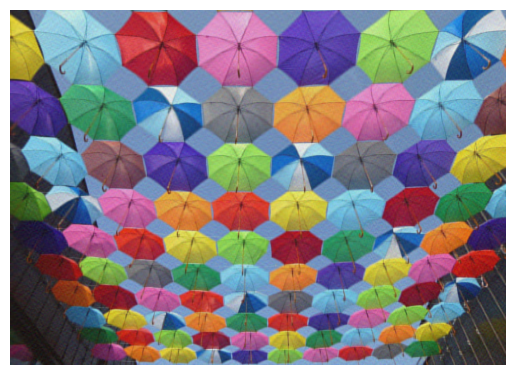

In [5]:
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))


recon_color_img_pil = Image.fromarray(recon_color_img)
plt.imshow(recon_color_img_pil)
plt.axis('off')  
plt.show()